Goh Jie Min Jamie, 202332158, jamiegoh@ajou.ac.kr

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("titanic_cleaned.csv")
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [5]:
df.describe()

#The count, average, min, max values, and the columns’ names in the data set are shown below.

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop('Survived',axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)


In [12]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))



[[145  18]
 [ 28  76]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       163
           1       0.81      0.73      0.77       104

    accuracy                           0.83       267
   macro avg       0.82      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [13]:
pd.DataFrame(rfc.feature_importances_, X_train.columns, columns=['Feature Importance'])

,Feature Importance
Pclass,0.085956
Age,0.266240
SibSp,0.044231
Parch,0.038401
Fare,0.282205
Sex_male,0.248713
Embarked_Q,0.011066
Embarked_S,0.023190


In [14]:
#Build a decisoin tree model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)

print(confusion_matrix(y_test,dtree_pred))
print(classification_report(y_test,dtree_pred))


[[137  26]
 [ 32  72]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       163
           1       0.73      0.69      0.71       104

    accuracy                           0.78       267
   macro avg       0.77      0.77      0.77       267
weighted avg       0.78      0.78      0.78       267



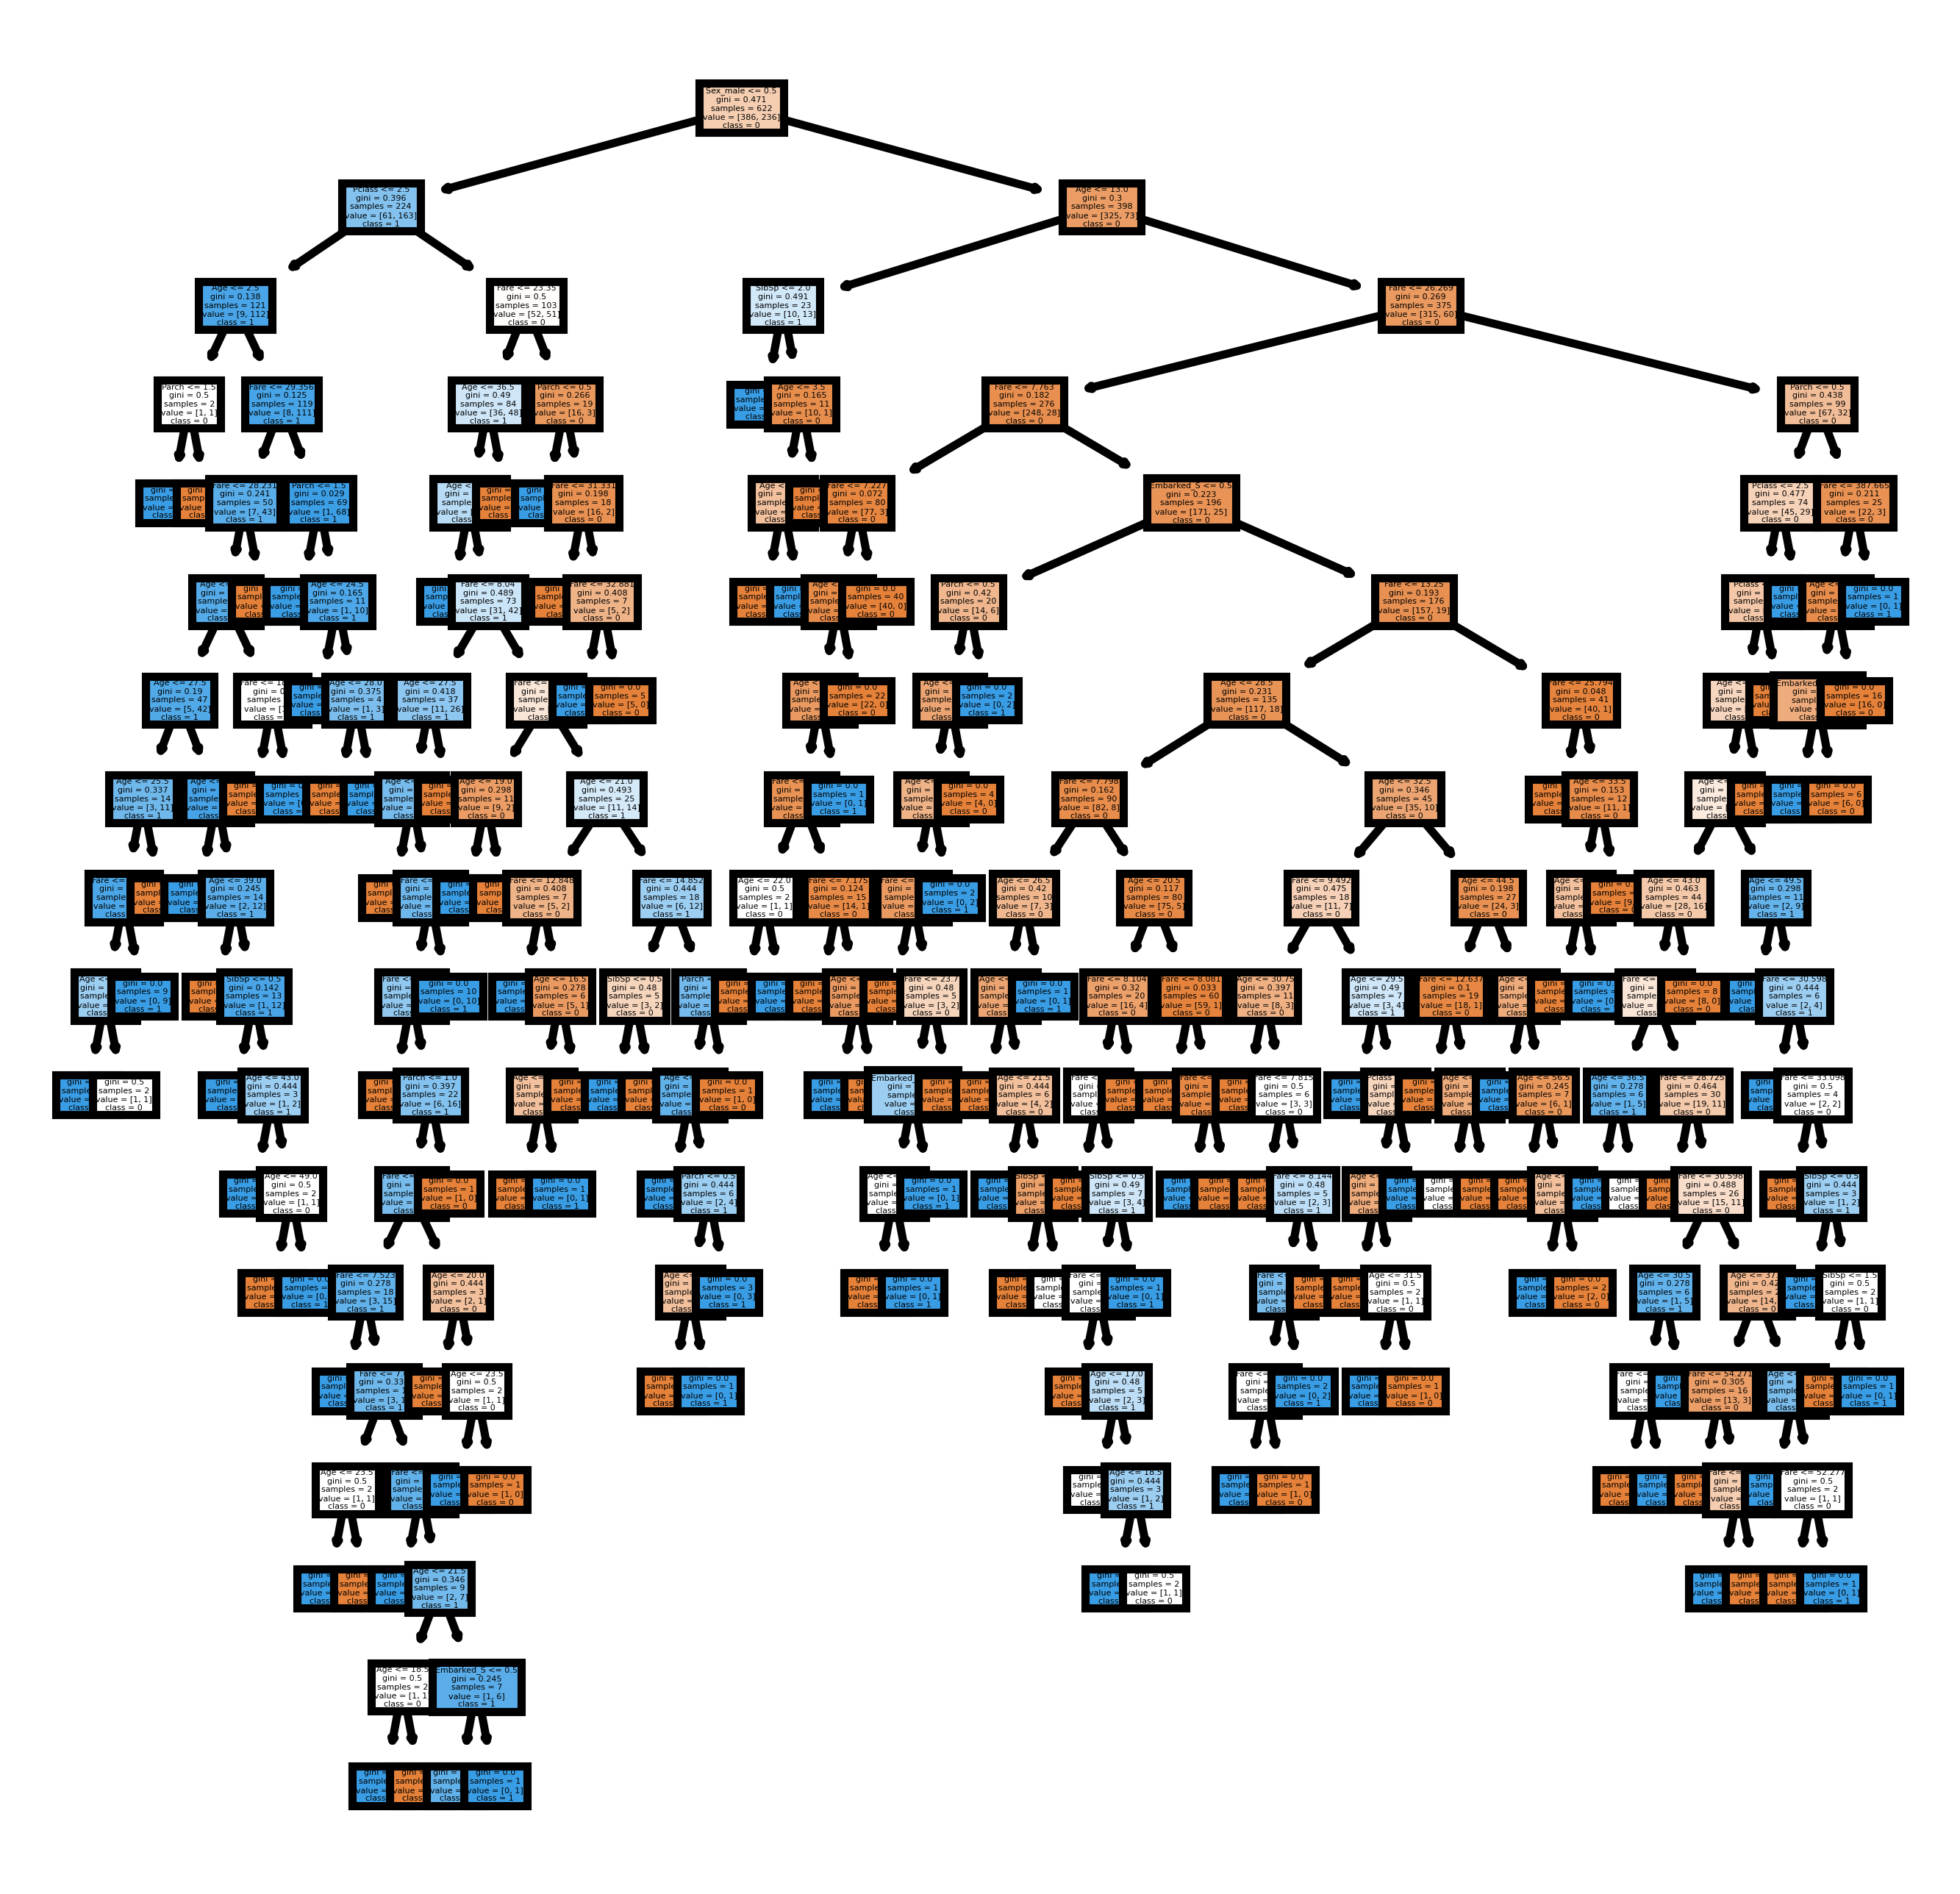

In [17]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(dtree,
                feature_names = X.columns,
                class_names=['0','1'],
                filled = True);
fig.savefig('dtree.png')


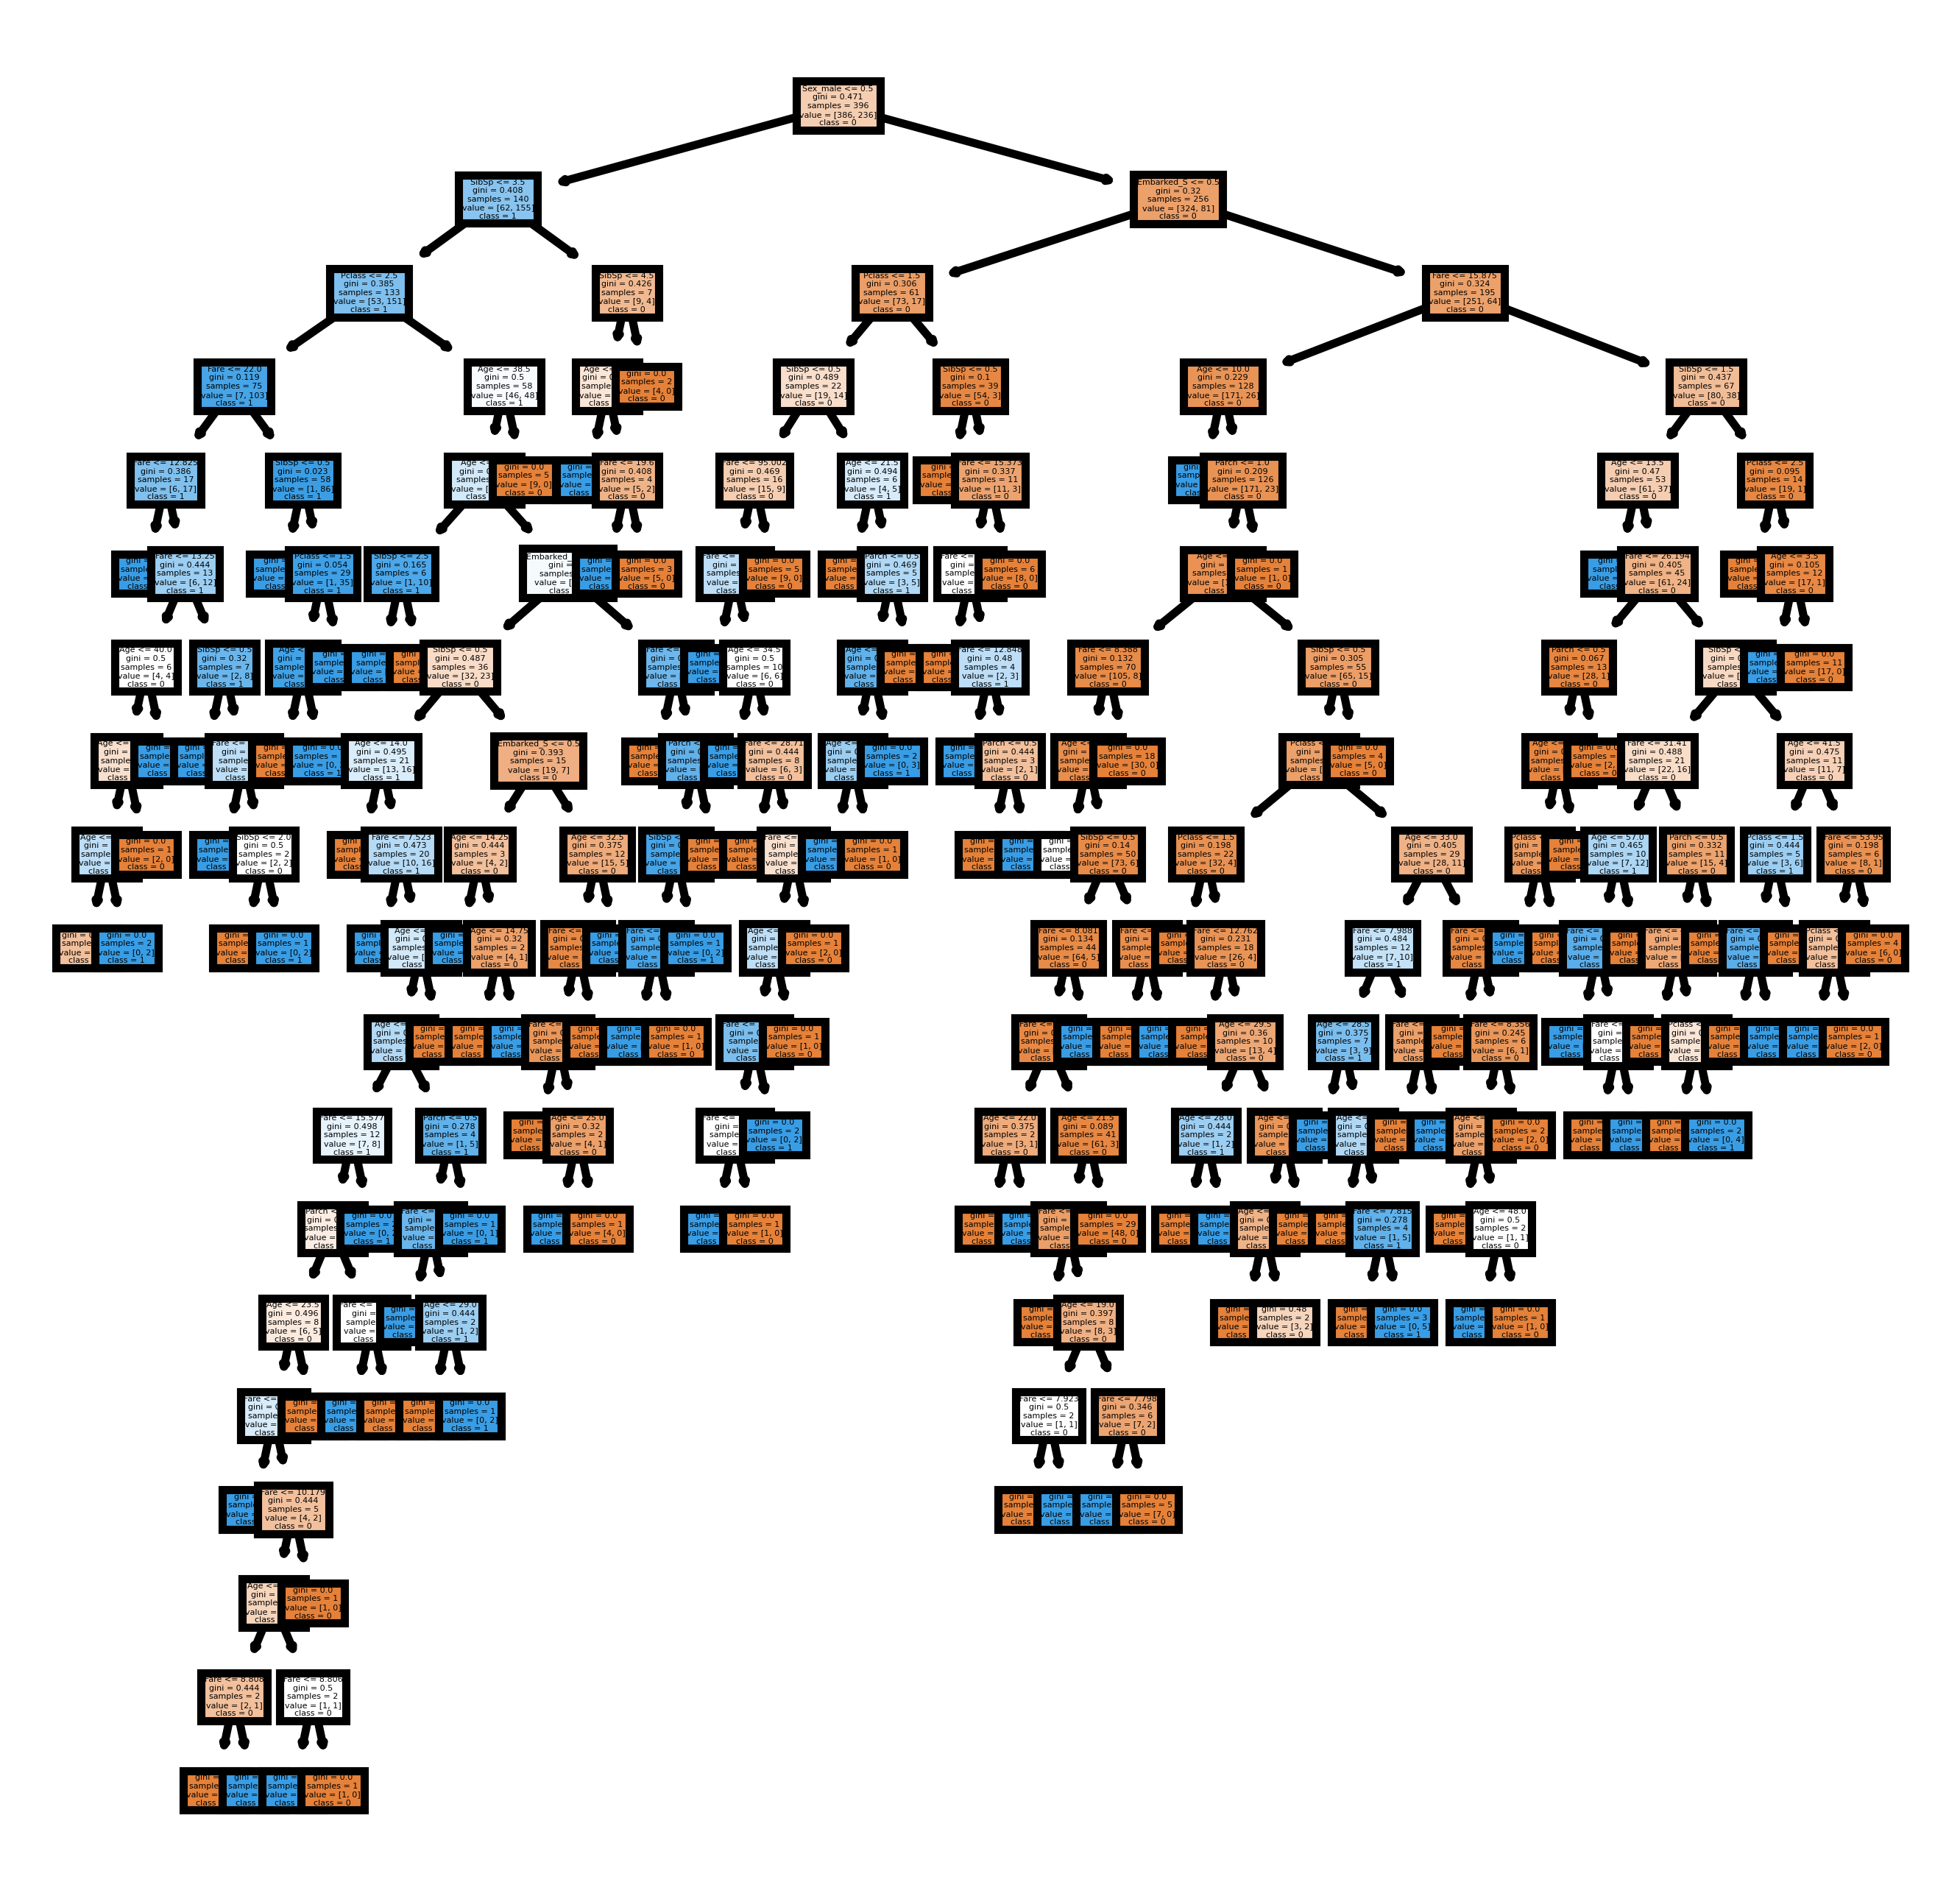

In [18]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rfc.estimators_[0],
                feature_names = X.columns,
                class_names=['0','1'],
                filled = True);
fig.savefig('rf_individualtree.png')


In [38]:
# import different algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# get accuracy score
from sklearn.metrics import accuracy_score

# prepare models
models=[]
models.append(('LR',LogisticRegression(solver='lbfgs',max_iter=1000)))
models.append(('RFC',RandomForestClassifier()))


# evaluate each model in turn
for name, model in models:
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    ac_score=accuracy_score(y_test,predictions)
    msg="%s: %f" % (name, ac_score)
    f_score=f1_score(y_test,predictions)
    format_f_score="%s: %f" % (name, f_score)
    print("Accuracy score" , msg)
    print("F score", format_f_score)  
    print(confusion_matrix(y_test,predictions))
    print(classification_report(y_test,predictions))
    

Accuracy score LR: 0.831461
F score LR: 0.761905
[[150  13]
 [ 32  72]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267

Accuracy score RFC: 0.808989
F score RFC: 0.746269
[[141  22]
 [ 29  75]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       163
           1       0.77      0.72      0.75       104

    accuracy                           0.81       267
   macro avg       0.80      0.79      0.80       267
weighted avg       0.81      0.81      0.81       267



In [39]:
models=[]

models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))

# evaluate each model in turn
for name, model in models:
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    ac_score=accuracy_score(y_test,predictions)
    msg="%s: %f" % (name, ac_score)
    f_score=f1_score(y_test,predictions)
    format_f_score="%s: %f" % (name, f_score)
    print("Accuracy score" , msg)
    print("F score", format_f_score)  
    print(confusion_matrix(y_test,predictions))
    print(classification_report(y_test,predictions))

Accuracy score KNN: 0.685393
F score KNN: 0.596154
[[121  42]
 [ 42  62]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       163
           1       0.60      0.60      0.60       104

    accuracy                           0.69       267
   macro avg       0.67      0.67      0.67       267
weighted avg       0.69      0.69      0.69       267

Accuracy score NB: 0.805243
F score NB: 0.731959
[[144  19]
 [ 33  71]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       163
           1       0.79      0.68      0.73       104

    accuracy                           0.81       267
   macro avg       0.80      0.78      0.79       267
weighted avg       0.80      0.81      0.80       267

